# Exercise 03 : Bar charts

### analyze only the users and not the admins
### the fontsize and the figsize remain the same
### for each hour, calculate the average number of commits on working days and on weekends (if there were no commits in an hour, do not use it to calculate the average) use these values for your graph, for example: Mon, 17-18: 5 commits, Tue, 17-18: 6 commits, Wed, 17-18: 7 commits
### choose a palette that you really enjoy, you do not have to replicate it from the graph above

In [1]:
import sqlite3
import pandas as pd

connection = sqlite3.connect('../data/logs.db')
cursor = connection.cursor()
cursor.execute("ATTACH DATABASE '../data/checking-logs.sqlite' AS logs")
connection.commit()

checker_query = """
SELECT *
FROM checker
WHERE uid LIKE 'user_%'
"""
timestamp = pd.io.sql.read_sql(checker_query, connection)
df = pd.DataFrame(timestamp)

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.dayofweek

working_days_df = df[df['day'] < 5]
weekends_df = df[df['day'] >= 5]

num_working_days = working_days_df.groupby(['hour'])['date'].nunique()
num_weekend_days = weekends_df.groupby(['hour'])['date'].nunique()

day_count = working_days_df.groupby(['hour'])['numTrials'].count().rename("commits")
end_count = weekends_df.groupby(['hour'])['numTrials'].count().rename("commits")

all_hours = pd.Index(range(24), name='hour')
average_day_commits = day_count / num_working_days.reindex(all_hours, fill_value=0)
average_end_commits = end_count / num_weekend_days.reindex(all_hours, fill_value=0)

connection.close()

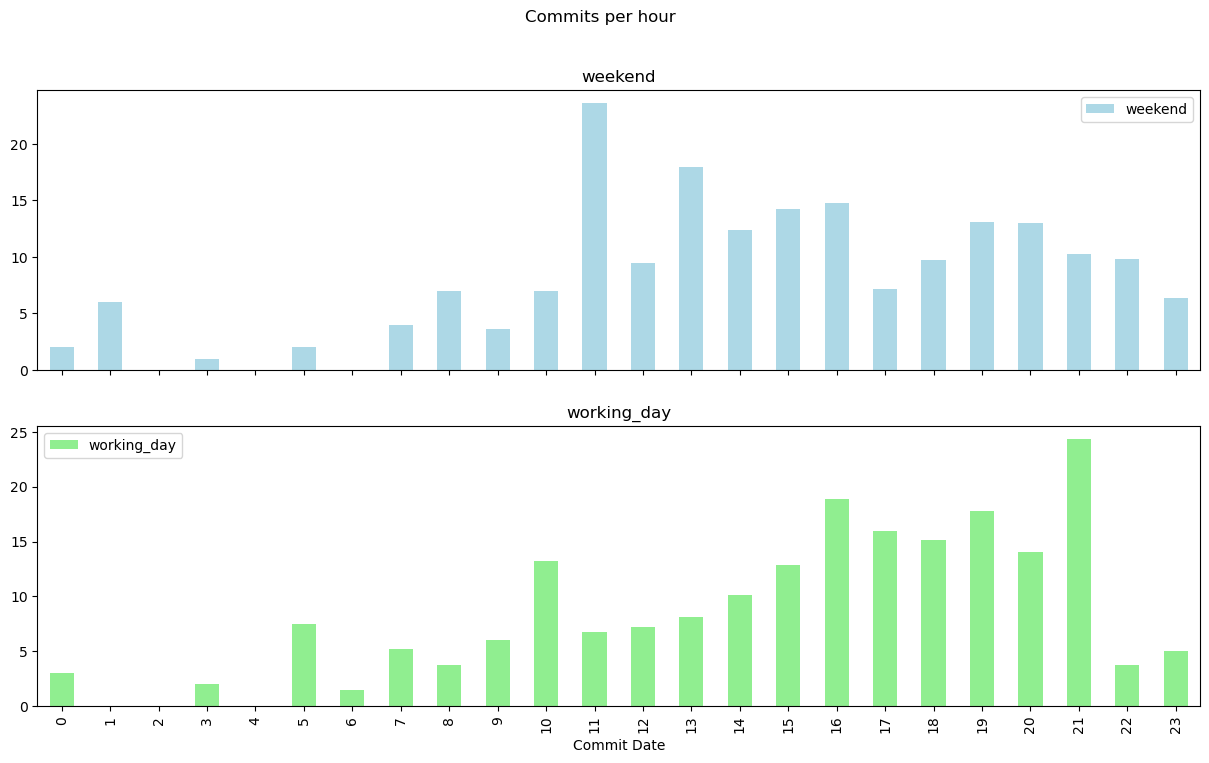

In [2]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
average_day_commits.plot(kind='bar', ax=axes[1], title='working_day', color= 'lightgreen')
average_end_commits.plot(kind='bar', ax=axes[0], title='weekend', color= 'lightblue')
plt.suptitle('Commits per hour')
axes[0].set_xlabel('')
axes[1].set_xlabel('Commit Date')
axes[0].legend(['weekend'])
axes[1].legend(['working_day'])
axes[0].set_xticklabels([])
# plt.xlim(0, 23)

plt.show()

## Is the dynamic different on working days and weekends?

During the weekend the most active time is afternoon but for working day it is the evening